# Intro:
This kernel will get anyone started that already finished the ML Course Package on Kaggle, but doesn't know what to do next.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams


In [80]:
#Read the data
df_train = pd.read_csv("../input/iowa-house-prices/train.csv", index_col = 'Id')
df_test = pd.read_csv("../input/iowa-house-prices/test.csv", index_col ='Id')

In [81]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
df_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [83]:
df_train.dropna(axis = 0, subset = ['SalePrice'], inplace = True)

In [84]:
y = df_train['SalePrice']

In [85]:
y 

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [86]:
df_train.drop(axis = 1, labels = ['SalePrice'], inplace = True)

In [87]:
# Shape
print(df_train.shape)
print(df_test.shape)

(1460, 79)
(1459, 79)


In [88]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [89]:
#dropping columns which are not required for prediction of new house
col_drop = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']
df_train.drop(labels = col_drop, axis = 1, inplace = True)


In [90]:
df_test.drop(labels = col_drop,axis=1,inplace=True)

In [91]:
print(df_train.shape)
print(df_test.shape)

(1460, 75)
(1459, 75)


# Numerical Data

In [92]:
num_col = [col for col in df_train.columns if df_train[col].dtype in ['int64','float64']]

In [93]:
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [94]:
cols_nulls = df_train[num_col].isnull().sum()

In [95]:
cols_nulls[cols_nulls >0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [96]:
#we can drop LotFrontage is have many null values
df = df_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].dropna(axis=0)


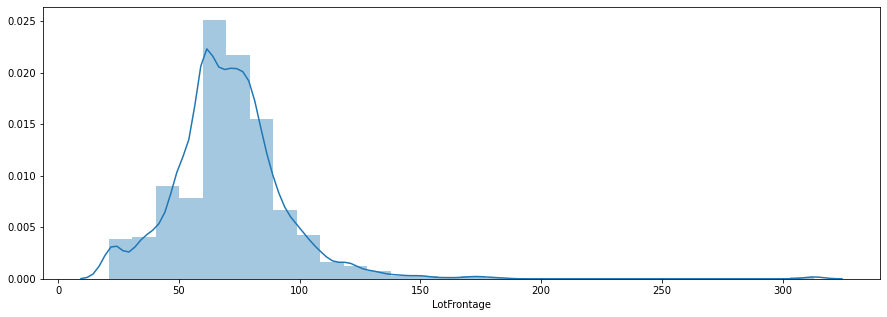

In [97]:
plt.figure(figsize=(15,5))
sns.distplot(df['LotFrontage'],bins=30,kde=True)

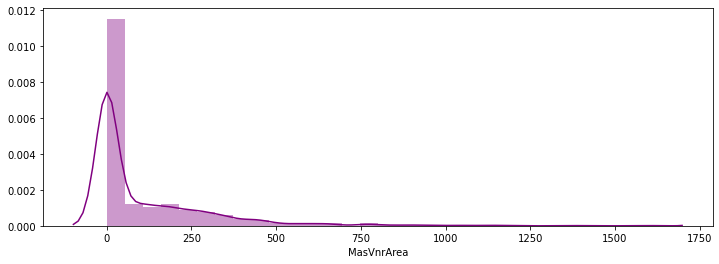

In [98]:

plt.figure(figsize = (12,4))
sns.distplot(a = df['MasVnrArea'], bins = 30, norm_hist=False, kde=True, color = 'purple')

In [ ]:

plt.figure(figsize = (12,4))
sns.distplot(a = df['GarageYrBlt'], bins = 30, norm_hist=False, kde=True, color = 'orange')

In [ ]:
from sklearn.impute import SimpleImputer

numerical_cols_median = ['LotFrontage']
numerical_transformer_median = SimpleImputer(strategy = 'median')

numerical_cols_mod = ['MasVnrArea']
numerical_transformer_mod = SimpleImputer(strategy = 'most_frequent')

numerical_cols_mean = ['GarageYrBlt']
numerical_transformer_mean = SimpleImputer(strategy = 'mean')

numerical_cols_remain = set(num_col) - set(numerical_cols_mean) - set(numerical_cols_median) - set(numerical_cols_mod)
numerical_cols_remain = list(numerical_cols_remain)

## Categorical Data

In [ ]:
cat_data = [col for col in df_train.columns if df_train[col].dtype == 'object']

In [ ]:
cat_data 

In [ ]:
cat_null = df_train[cat_data].isnull().sum()


In [ ]:
cat_null[cat_null > 0]

In [ ]:
#Because there are a few columns with too many missing values, we'll filter them out from the data
df_train.drop(labels = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [ ]:
#Because there are a few columns with too many missing values, we'll filter them out from the data
df_test.drop(labels = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [ ]:
#Redo categorical_cols variable
categorical_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']

## PipeLine and One Hot Encoding 

In [ ]:
#performing imputer and OHE to encode the features
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
cat_tranform = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                              ('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num_median', numerical_transformer_median, numerical_cols_median),
                                               ('num_mod', numerical_transformer_mod, numerical_cols_mod),
                                               ('num_mean', numerical_transformer_mean, numerical_cols_mean),
                                               ('num_rest', numerical_transformer_mean, numerical_cols_remain),
                                              ('cat', cat_tranform, categorical_cols)])

# Training


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train, y, test_size = 0.3, random_state = 0)


In [ ]:
def modelfit(model):
    pipeline = Pipeline(steps=[('preprocessing',preprocessor),
                              ('model',model)])
    pipeline.fit(X_train,y_train)
    pred = pipeline.predict(X_valid)
    mae = mean_absolute_error(y_valid,pred)
    print('MAE',mae)

In [ ]:
xgb1 = XGBRegressor( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27, objective='reg:squarederror')
modelfit(xgb1)

# Tunning Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# param_1= {'max_depth' : range(3, 10, 2),
#           'min_child_weight' : range(1, 6, 2),
#           'reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100],
#           'gamma' : [i/10.0 for i in range(0,5)],
#           'subsample' : [i/10.0 for i in range(6,10)],
#           'colsample_bytree' : [i/10.0 for i in range(6,10)]}
#Use parameters and apply tunning
xgb_final = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.8, verbosity=1)
modelfit(xgb_final)


In [ ]:
#my model with all tunings
my_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=5000,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.8, verbosity=1)
pipeline_final = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', my_model)])

pipeline_final.fit(df_train, y)

preds_test = pipeline_final.predict(df_test)


In [ ]:
output = pd.DataFrame({'Id': df_test.index, 'SalePrice' : preds_test})

In [ ]:
output